In [17]:
import pandas as pd
import seaborn as sns
from scipy import stats

# Завантажимо +дані Titanic з бібліотеки seaborn
titanic = sns.load_dataset('titanic')

# Перевірка даних
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [18]:
# Вибірка за статтю
male_age = titanic[titanic['sex'] == 'male']['age'].dropna()
female_age = titanic[titanic['sex'] == 'female']['age'].dropna()

# Проведення t-тесту
t_stat, p_value = stats.ttest_ind(male_age, female_age)

print(f"T-статистика: {t_stat}")
print(f"P-значення: {p_value}")


T-статистика: 2.499206354920835
P-значення: 0.012671296797013709


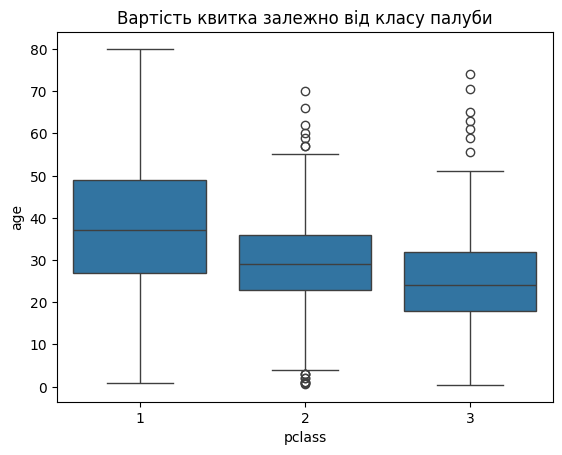

In [19]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Графік класу палуби та вартості квитка
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('Вартість квитка залежно від класу палуби')
plt.show()




ANOVA для віку (age) залежно від класу палуби (pclass):
                  sum_sq     df          F        PR(>F)
C(pclass)   20929.627754    2.0  57.443484  7.487984e-24
Residual   129527.008190  711.0        NaN           NaN


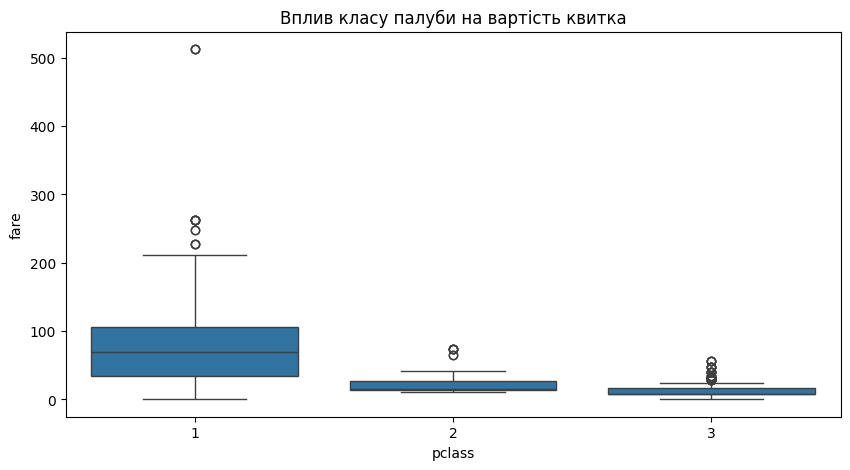

ANOVA для вартості квитка (fare) залежно від класу палуби (pclass):
                 sum_sq     df           F        PR(>F)
C(pclass)  7.215674e+05    2.0  201.169891  5.800772e-70
Residual   1.275127e+06  711.0         NaN           NaN


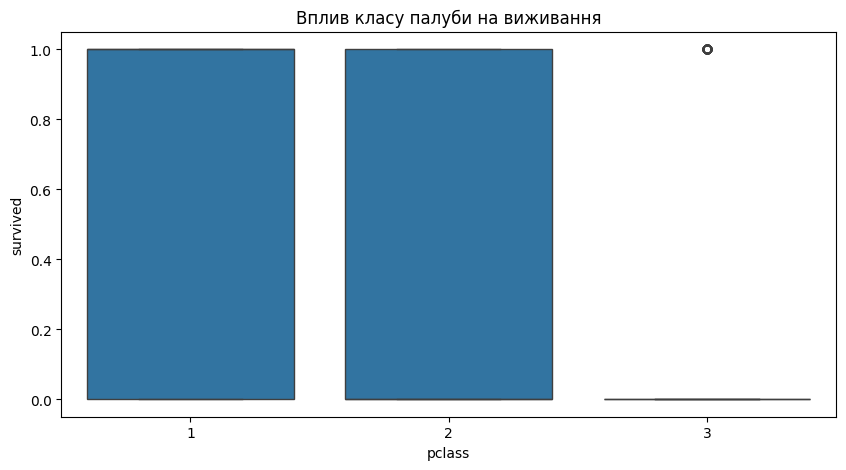

ANOVA для виживання (survived) залежно від класу палуби (pclass):
               sum_sq     df          F        PR(>F)
C(pclass)   22.407312    2.0  53.174254  3.012015e-22
Residual   149.805573  711.0        NaN           NaN


In [20]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Завантажимо дані Titanic з бібліотеки seaborn
titanic = sns.load_dataset('titanic')

# Видалимо пропущені значення у віці, класі, вартості квитка та виживанні
titanic_clean = titanic.dropna(subset=['age', 'pclass', 'fare', 'survived'])

# 1. Однофакторний ANOVA для впливу класу палуби (pclass) на вік (age)
model_age = ols('age ~ C(pclass)', data=titanic_clean).fit()
anova_age = sm.stats.anova_lm(model_age, typ=2)
print("ANOVA для віку (age) залежно від класу палуби (pclass):")
print(anova_age)

# 2. Графічний аналіз впливу класу палуби на вартість квитка (fare)
plt.figure(figsize=(10, 5))
sns.boxplot(x='pclass', y='fare', data=titanic_clean)
plt.title('Вплив класу палуби на вартість квитка')
plt.show()

# 3. ANOVA для вартості квитка (fare) залежно від класу палуби (pclass)
model_fare = ols('fare ~ C(pclass)', data=titanic_clean).fit()
anova_fare = sm.stats.anova_lm(model_fare, typ=2)
print("ANOVA для вартості квитка (fare) залежно від класу палуби (pclass):")
print(anova_fare)

# 4. Графічний аналіз впливу класу палуби на виживання (survived)
plt.figure(figsize=(10, 5))
sns.boxplot(x='pclass', y='survived', data=titanic_clean)
plt.title('Вплив класу палуби на виживання')
plt.show()

# 5. ANOVA для виживання (survived) залежно від класу палуби (pclass)
model_survived = ols('survived ~ C(pclass)', data=titanic_clean).fit()
anova_survived = sm.stats.anova_lm(model_survived, typ=2)
print("ANOVA для виживання (survived) залежно від класу палуби (pclass):")
print(anova_survived)
